# Titanic


1- understand the purpose and content of the project

2- read and examine data

3- data manipulations, selecting columns to use, changing data types

4- feature engineering

5- separate data as x and y (regression, classification), separate as x (clustering)

6- train the model and predict (fit - predict)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [84]:
df1 = pd.read_csv('ttrain.csv')

In [85]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df2 = pd.read_csv('ttest.csv')  

In [87]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
df = pd.concat([df1, df2], ignore_index=True)

### EDA - Exploratory Data Analysis

In [89]:
df.shape

(1309, 12)

In [90]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [91]:
df.Fare.mean(), df.Fare.max(), df.Fare.min(), df.Fare.median(), df.Fare.std()

(33.29547928134557, 512.3292, 0.0, 14.4542, 51.75866823917414)

In [92]:
df.Fare.value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [93]:
df.Fare.fillna(df.Fare.mean(), inplace=True)

In [94]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

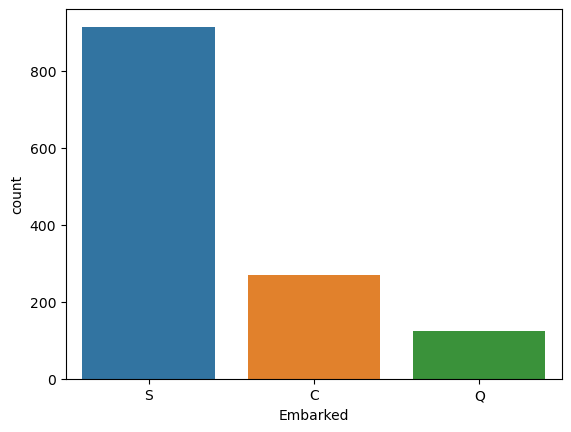

In [95]:
sns.countplot(x=df.Embarked)

In [96]:
df.Embarked.fillna('S', inplace=True)

In [97]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [98]:
df.shape

(1309, 12)

In [99]:
df.Cabin.value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [100]:
del df['Cabin']

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [102]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [103]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=True)

In [104]:
df.Title.value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

mod mean median

silmek

baska siniflardan yardim alarak doldurmak

karar agaci ile doldurmak

In [105]:
df.Title = df.Title.replace(['Ms', 'Mile','Mlle'], 'Miss')

In [106]:
df.Title = df.Title.replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')

In [107]:
df.Title = df.Title.replace(['Dr', 'Major','Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')

In [108]:
df.Title.value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [109]:
df= df.drop(['Name'], axis=1)

In [110]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [111]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [112]:
df.Age.mean()

29.547876241405653

In [113]:
df[ df['Title'] == 'Master' ]['Age'].mean()

5.2881967213114764

In [114]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [115]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.024425,-0.055224,0.008942,0.031416
Survived,-0.005007,1.000000,-0.338481,-0.075808,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.386723,0.060832,0.018322,-0.558477
Age,0.024425,-0.075808,-0.386723,1.000000,-0.216262,-0.132567,0.177429
SibSp,-0.055224,-0.035322,0.060832,-0.216262,1.000000,0.373587,0.160224
Parch,0.008942,0.081629,0.018322,-0.132567,0.373587,1.000000,0.221522
Fare,0.031416,0.257307,-0.558477,0.177429,0.160224,0.221522,1.000000


In [116]:
del df['PassengerId']

In [117]:
del df['Ticket']

In [118]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [119]:
### Feature Engineering

In [120]:
df = pd.get_dummies(df, drop_first=True)

In [121]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,True,False,True,False,True,False
1,1.0,1,38.0,1,0,71.2833,False,False,False,False,False,True
2,1.0,3,26.0,0,0,7.9250,False,False,True,True,False,False
3,1.0,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,0.0,3,35.0,0,0,8.0500,True,False,True,False,True,False


In [122]:
train  = df[df.Survived.notnull()]

In [123]:
test = df[df.Survived.isnull()]

In [124]:
x = train.drop(['Survived'], axis=1)
y = train['Survived']